# Training model with cleand dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # for train_test_split
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.linear_model import LinearRegression # for Linear Regression Model
from sklearn.metrics import mean_squared_error,mean_absolute_error # for finding errors
from sklearn.metrics import r2_score # for Checking Accuracy 
from sklearn.linear_model import Lasso # for Lasso Regression Model
from sklearn.linear_model import Ridge # for Ridge Regression Model
import pickle # for pickling

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
df

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# Encoding in Classes feature
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


## **Fire Weather Index (FWI) Index: 0 to 31.1 is target variable**


In [11]:
# dividing intodependent and independent features
X = df.drop('FWI',axis=1)
y = df['FWI']


In [12]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((182, 11), (182,), (61, 11), (61,))

###  Feature Selection based on correlaltion

In [14]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


Text(0.5, 1.0, 'correlation for feature selection')

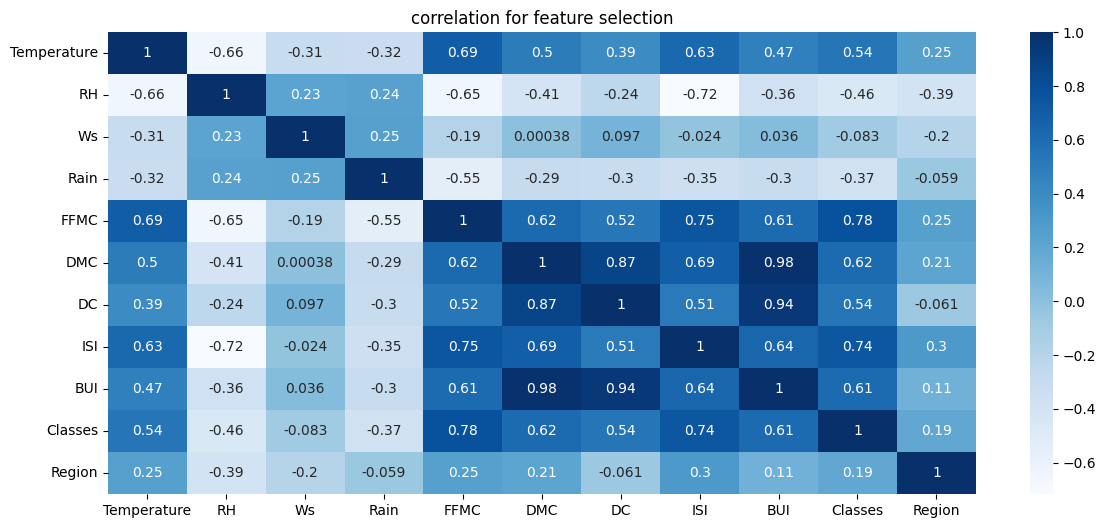

In [15]:
plt.figure(figsize=(14,6))
sns.heatmap(X_train.corr(),annot=True,cmap='Blues')
plt.title('correlation for feature selection')

Text(0.5, 1.0, 'correlation for feature selection')

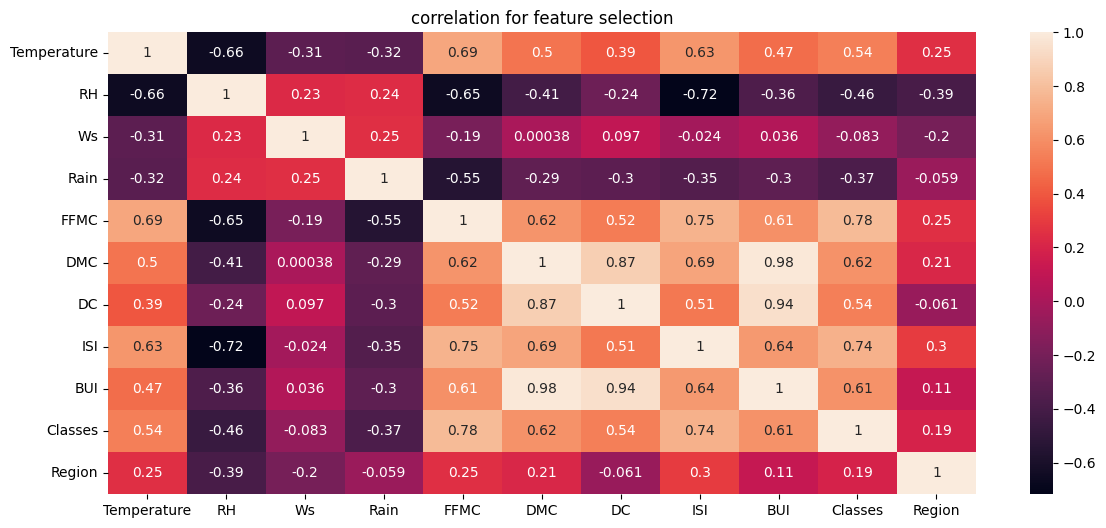

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(X_train.corr(),annot=True)
plt.title('correlation for feature selection')

In [17]:
X_train.shape

(182, 11)

In [18]:
# function for finding correlation 

# threshold value is given by domain expertise
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [19]:
correlation(X_train,0.85) 
# I am in conclusion that BUI and DC are highly correlated

{'BUI', 'DC'}

In [20]:
# removing one feature would be best good option
X_train.drop('DC',axis=1,inplace=True)
X_test.drop('DC',axis=1,inplace=True)

In [21]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

## Standardization

In [22]:
scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled.shape

(182, 10)

In [25]:
X_test_scaled.shape

(61, 10)

## Understanding the effect of Scaling

Text(0.5, 1.0, 'After scaling')

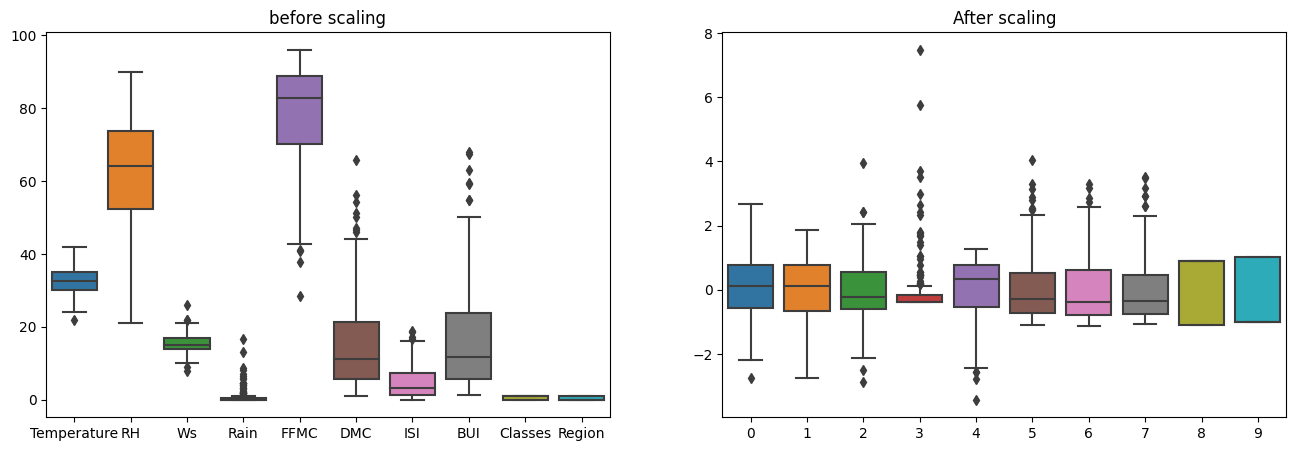

In [26]:
plt.subplots(1,2,figsize = (16,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('After scaling')

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_4836\1132160022.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train)
C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_4836\1132160022.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled)


Text(0.5, 1.0, 'After scaling')

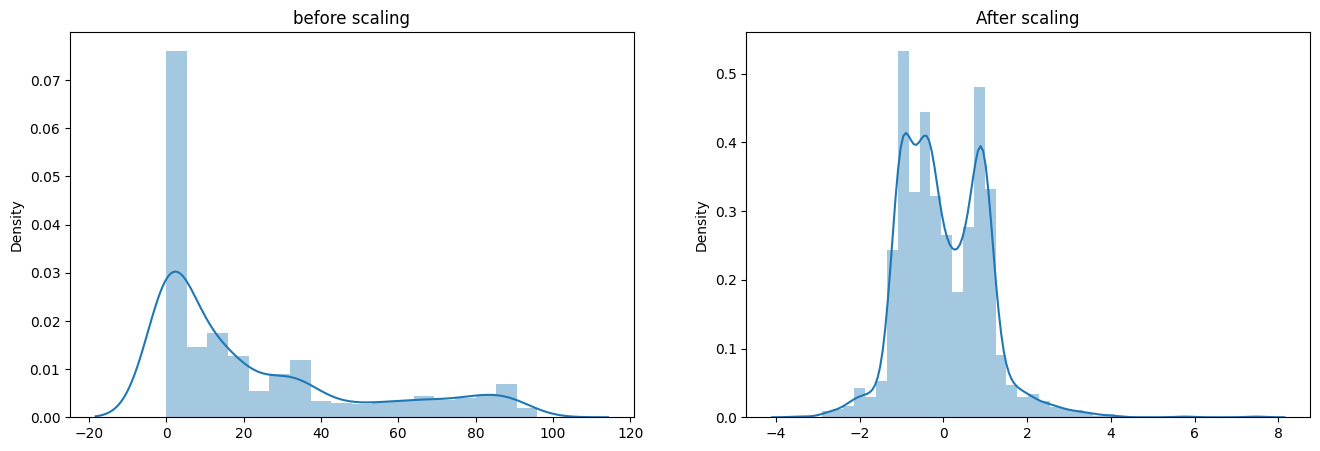

In [27]:
plt.subplots(1,2,figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(X_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.distplot(X_train_scaled)
plt.title('After scaling')
# here my values rangs between -2 t0 2

Text(0.5, 1.0, 'After scaling')

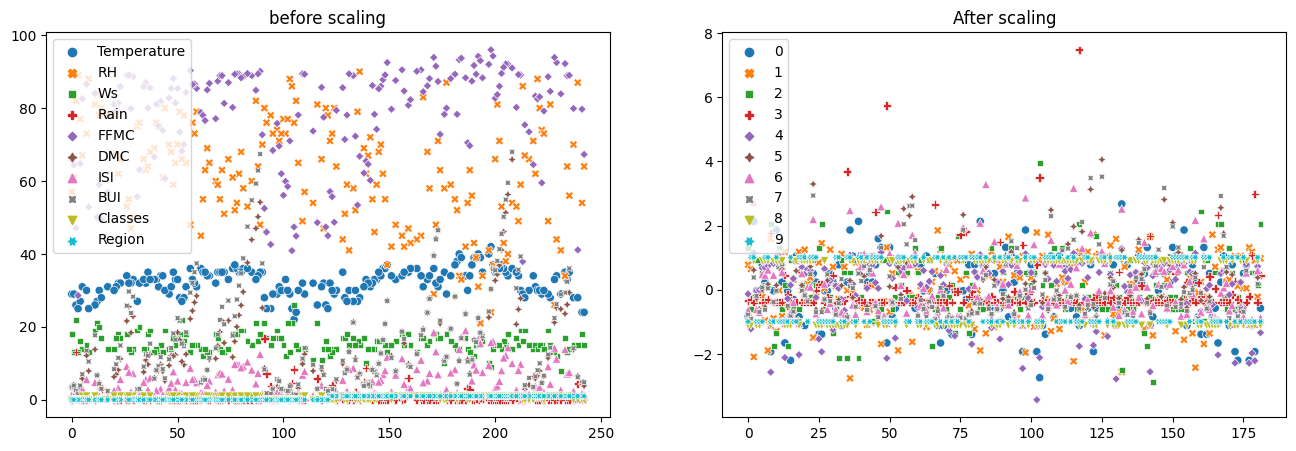

In [28]:
plt.subplots(1,2,figsize = (16,5))
plt.subplot(1,2,1)
sns.scatterplot(X_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.scatterplot(X_train_scaled)
plt.title('After scaling')
# here my values rangs between -2 t0 2

## Linear Regression Model
this finds the best fit line But it could be biased

In [29]:
# training model
linear_regresssion = LinearRegression(n_jobs=-1)
linear_regresssion.fit(X=X_train_scaled,y=y_train)
# predicting 
y_pred_test_linear = linear_regresssion.predict(X_test_scaled)
print(y_pred_test_linear.shape,y_test.shape)
y_pred_test_linear,y_test

(61,) (61,)


(array([ 8.30457914,  7.48543259, -0.07124803,  5.1239953 ,  6.58646661,
         1.34845765,  2.29146389,  7.46320932,  1.91726023,  3.1720968 ,
         0.06104952,  7.8522068 ,  9.50002921, 16.40375946, 19.06240412,
         1.26460683,  2.14282766, -0.03921186,  6.7910547 ,  3.16474665,
         1.26043867,  0.24044841,  6.44149991,  0.08436122, 20.99410994,
         4.87656305,  5.88138004,  9.95537379,  0.18798004,  9.69921185,
         6.34859082, -0.13114286, 10.28194824, 15.02613276,  1.30305119,
         0.62923538,  1.87653957,  6.12315886, -0.31545055, -0.52966099,
         7.0779492 ,  1.61961767,  8.47263835, -0.37422259, 15.24420514,
         7.90097258,  7.71318307,  1.01994088, 12.53560642,  0.85369155,
        28.74405001,  5.45760121, 17.0982405 , 20.06235185, 14.33230103,
        16.55893998,  0.68548131,  8.77001654,  3.68182833, 14.67609754,
         5.08865108]),
 24      8.4
 6       7.2
 152     0.5
 232     3.8
 238     6.5
        ... 
 162     0.8
 178     9

In [30]:
# checking errors
mse_linear = mean_squared_error(y_true=y_test,y_pred=y_pred_test_linear)
mae_linear = mean_absolute_error(y_true=y_test,y_pred=y_pred_test_linear)
rmse_linear = np.sqrt(mse_linear)
print(mse_linear)
print(mae_linear)
print(rmse_linear)

0.49929994592624194
0.48195599322606575
0.7066115948144652


In [45]:
 # Checking Accuracy of model
score_r2_linear = r2_score(y_true=y_test,y_pred=y_pred_test_linear)
adjusted_score_r2_linear = 1-(1-score_r2_linear)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_linear',score_r2_linear) # more than sir's models score 😎😎
print('adjusted_score_r2_linear',adjusted_score_r2_linear)

score_r2_linear 0.9887190731606889
adjusted_score_r2_linear 0.9864628877928266


## Lasso Linear Regression model
this is used for feature selection

In [32]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_test_lasso = lasso.predict(X_test_scaled)
print(y_test.shape,y_pred_test_lasso.shape)
y_test,y_pred_test_lasso

(61,) (61,)


(24      8.4
 6       7.2
 152     0.5
 232     3.8
 238     6.5
        ... 
 162     0.8
 178     9.0
 224     3.9
 230    15.4
 154     5.2
 Name: FWI, Length: 61, dtype: float64,
 array([ 8.08090242,  7.48341549,  0.99641957,  5.81805893,  7.00585268,
         2.71872715,  3.40455785,  7.60215125,  2.7791459 ,  3.97952217,
         1.4775268 ,  8.56705185,  9.37388304, 15.29310317, 16.85102039,
         2.76282066,  2.31956802, -0.42759811,  7.04447122,  4.0171246 ,
         2.82781972,  0.92137145,  6.55962751,  0.77962732, 19.04903513,
         5.55931863,  6.01503235,  9.45451401, -0.65659305,  9.75725352,
         6.62482167,  0.96106423,  9.78485148, 13.53174104,  2.58533403,
         2.21874657,  2.72232559,  6.37895134,  0.24649694,  0.2830189 ,
         6.72929238,  2.85120901,  8.15454105, -0.55878568, 14.26176602,
         7.92719224,  8.19668225,  1.84414333, 12.1252714 ,  1.80436443,
        25.24848336,  5.9500686 , 15.80908318, 17.61125046, 13.07024204,
        14.764

In [33]:
# checking errors
mae_lasso = mean_absolute_error(y_test,y_pred_test_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_test_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print('mse_lasso ',mse_lasso)
print('mae_lasso ',mae_lasso)
print('rmse_lasso',rmse_lasso)

mse_lasso  2.00005294676491
mae_lasso  1.081630596592488
rmse_lasso 1.4142322817574595


In [34]:
 # Checking Accuracy of model
score_r2_lasso = r2_score(y_true=y_test,y_pred=y_pred_test_lasso)
adjusted_score_r2_lasso = 1-(1-score_r2_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_lasso ',score_r2_lasso) # more than sir's models score 😎😎
print('adjusted_score_r2_lasso ',adjusted_score_r2_lasso)

score_r2_lasso  0.9548118297402409
adjusted_score_r2_lasso  0.9457741956882891


## Ridge Linear Regression model
this reduces overfitting

In [35]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_test_ridge = ridge.predict(X_test_scaled)
y_test.shape,y_pred_test_ridge.shape
y_test,y_pred_test_ridge

(24      8.4
 6       7.2
 152     0.5
 232     3.8
 238     6.5
        ... 
 162     0.8
 178     9.0
 224     3.9
 230    15.4
 154     5.2
 Name: FWI, Length: 61, dtype: float64,
 array([ 8.30269488,  7.52098051, -0.04495765,  5.08377127,  6.63639421,
         1.37216094,  2.29784722,  7.61785902,  1.8584398 ,  3.26675091,
         0.14834946,  8.15168874,  9.49537925, 16.47360556, 18.97143921,
         1.33740036,  2.11311679, -0.14348518,  6.82187254,  3.23494735,
         1.2640114 ,  0.20798867,  6.47129482,  0.12639464, 20.86996819,
         5.00861887,  5.92426061,  9.9559326 ,  0.04429177,  9.71415964,
         6.37764349, -0.14864868, 10.301104  , 14.99168115,  1.36171915,
         0.6444501 ,  1.93182882,  6.23361569, -0.38789572, -0.4743158 ,
         7.10459074,  1.65240496,  8.50268779, -0.44325098, 15.22959518,
         7.9595105 ,  7.79392547,  1.06953748, 12.58940053,  0.92758973,
        28.79294986,  5.57976209, 17.04553115, 19.94118881, 14.24232563,
        16.562

In [36]:
# checking errors
mae_ridge = mean_absolute_error(y_test,y_pred_test_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_test_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print('mse_ridge ',mse_ridge)
print('mae_ridge ',mae_ridge)
print('rmse_ridge',rmse_ridge)

mse_ridge  0.5281948451212578
mae_ridge  0.49770729505590805
rmse_ridge 0.7267701460030247


In [43]:
 # Checking Accuracy of model
score_r2_ridge = r2_score(y_true=y_test,y_pred=y_pred_test_ridge)
adjusted_score_r2_ridge = 1-(1-score_r2_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_ridge ',score_r2_ridge)  # more than sir's models score 😎😎
print('adjusted_score_r2_ridge ',adjusted_score_r2_ridge)

score_r2_ridge  0.9880662366312486
adjusted_score_r2_ridge  0.9856794839574983


## Elastic Net Linear Regression model
this do work of lasso and linear both models work

In [38]:
# training model
elasticNet = Lasso()
elasticNet.fit(X_train_scaled,y_train)
y_pred_test_elasticNet = elasticNet.predict(X_test_scaled)
print(y_test.shape,y_pred_test_elasticNet.shape)
y_test,y_pred_test_elasticNet

(61,) (61,)


(24      8.4
 6       7.2
 152     0.5
 232     3.8
 238     6.5
        ... 
 162     0.8
 178     9.0
 224     3.9
 230    15.4
 154     5.2
 Name: FWI, Length: 61, dtype: float64,
 array([ 8.08090242,  7.48341549,  0.99641957,  5.81805893,  7.00585268,
         2.71872715,  3.40455785,  7.60215125,  2.7791459 ,  3.97952217,
         1.4775268 ,  8.56705185,  9.37388304, 15.29310317, 16.85102039,
         2.76282066,  2.31956802, -0.42759811,  7.04447122,  4.0171246 ,
         2.82781972,  0.92137145,  6.55962751,  0.77962732, 19.04903513,
         5.55931863,  6.01503235,  9.45451401, -0.65659305,  9.75725352,
         6.62482167,  0.96106423,  9.78485148, 13.53174104,  2.58533403,
         2.21874657,  2.72232559,  6.37895134,  0.24649694,  0.2830189 ,
         6.72929238,  2.85120901,  8.15454105, -0.55878568, 14.26176602,
         7.92719224,  8.19668225,  1.84414333, 12.1252714 ,  1.80436443,
        25.24848336,  5.9500686 , 15.80908318, 17.61125046, 13.07024204,
        14.764

In [41]:
# checking errors
mae_elasticNet = mean_absolute_error(y_test,y_pred_test_elasticNet)
mse_elasticNet = mean_squared_error(y_test,y_pred_test_elasticNet)
rmse_elasticNet = np.sqrt(mse_elasticNet)
print('mse_elasticNet ',mse_elasticNet)
print('mae_elasticNet ',mae_elasticNet)
print('rmse_elasticNet',rmse_elasticNet)

mse_elasticNet  2.00005294676491
mae_elasticNet  1.081630596592488
rmse_elasticNet 1.4142322817574595


In [47]:
 # Checking Accuracy of model
score_r2_elasticNet = r2_score(y_true=y_test,y_pred=y_pred_test_elasticNet)
adjusted_score_r2_elasticNet = 1-(1-score_r2_elasticNet)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('score_r2_elasticNet ',score_r2_elasticNet,)  # more than sir's models score 😎😎
print('adjusted_score_r2_elasticNet ',adjusted_score_r2_elasticNet)

score_r2_elasticNet  0.9548118297402409
adjusted_score_r2_elasticNet  0.9457741956882891


## Making pickle file 
I am making Ridge Linear Regression algorithms pickle file because It reduces overfitting and my r2_score is almost same also

In [53]:
# searializing model
pickle.dump(scaler,open('scaler.pkl','wb')) # StandardScaler  model
pickle.dump(ridge,open('ridge.pkl','wb'))# Ridge model